<a href="https://colab.research.google.com/github/Rushikesh3005/Mobile-price-range-prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name:-Mobile price Prediction


#Problem Statement

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

#Data Description -

Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mounting  drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [34]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#Checking null values in dataset

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Checking class values are balanced or not

In [ ]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#Data Visualization

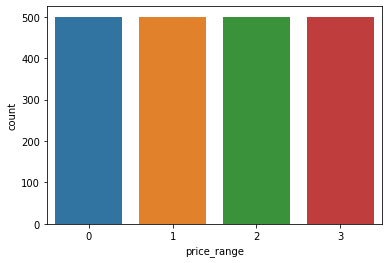

In [ ]:
#Count of values for Price range
sns.countplot(x="price_range", data=df)

In [ ]:
numeric_features = ['battery_power','clock_speed','m_dep','mobile_wt','n_cores','px_height','px_width','ram','fc','int_memory','pc','sc_h','sc_w','talk_time']
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

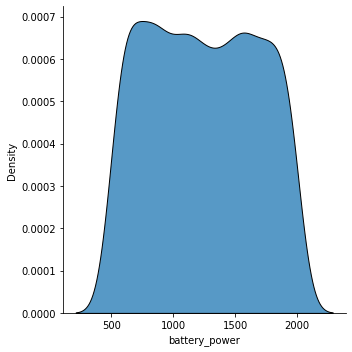

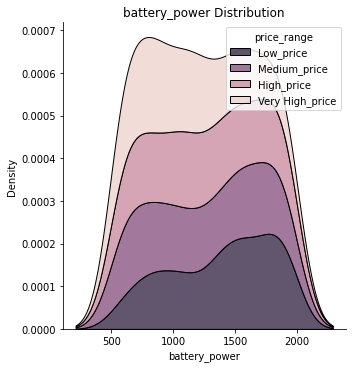

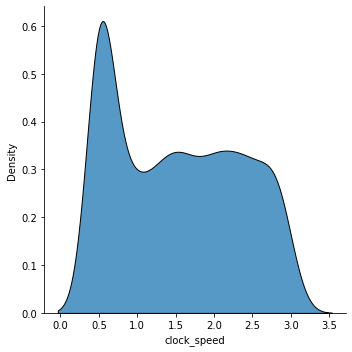

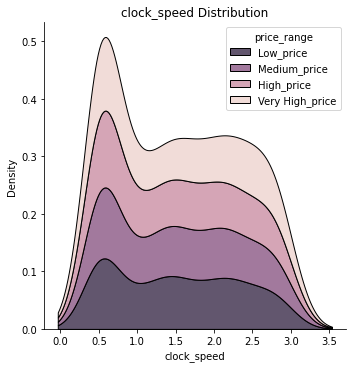

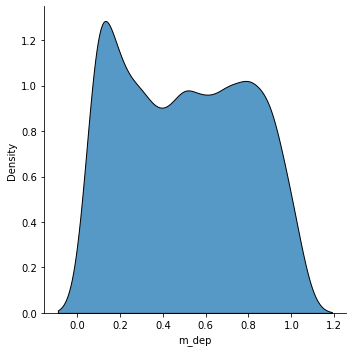

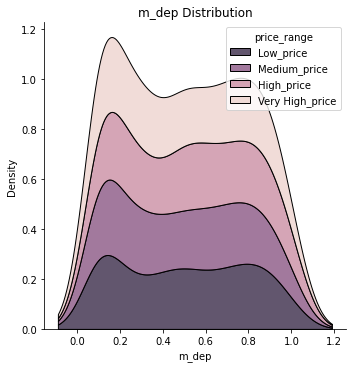

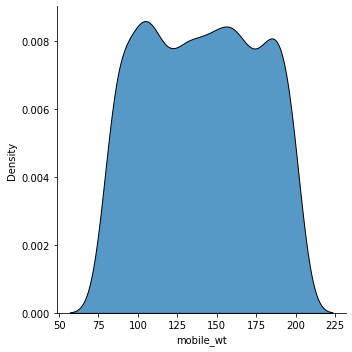

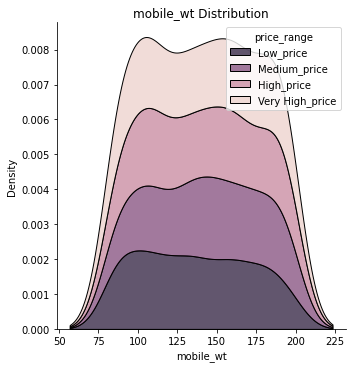

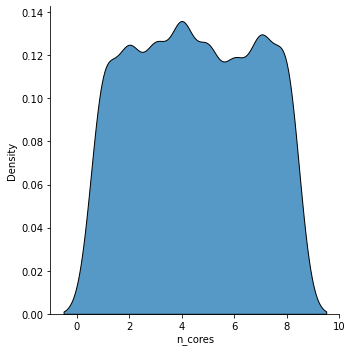

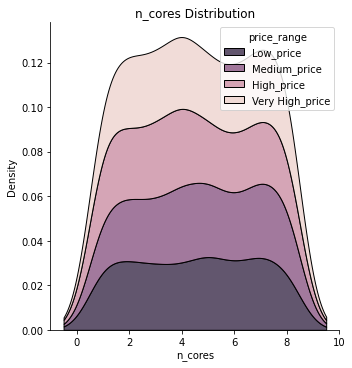

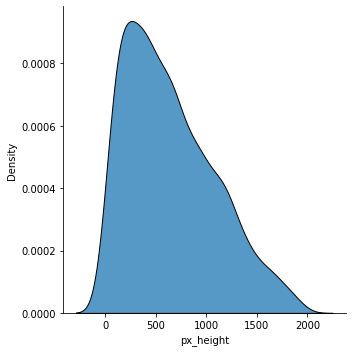

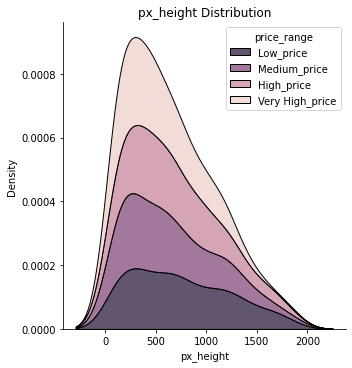

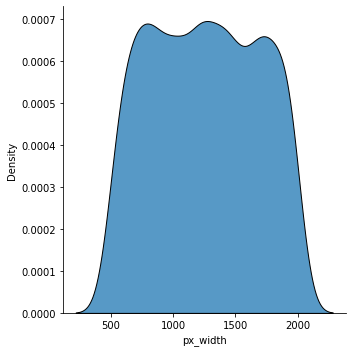

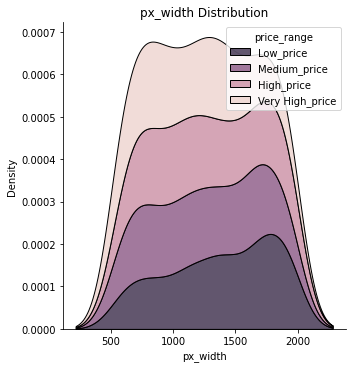

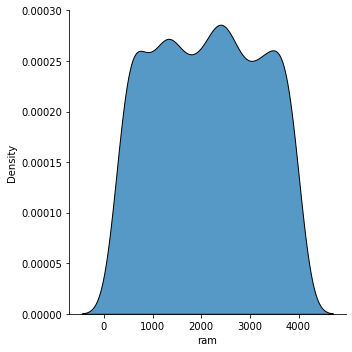

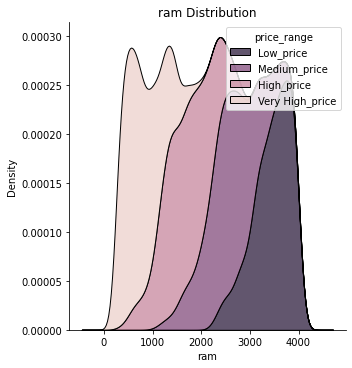

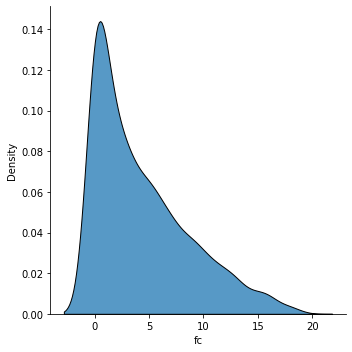

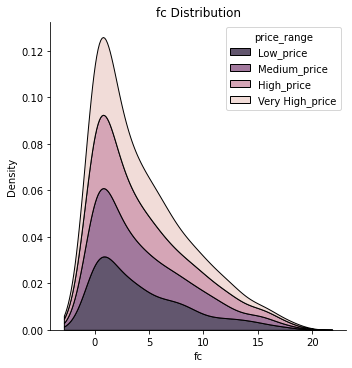

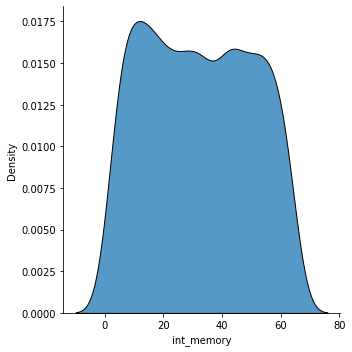

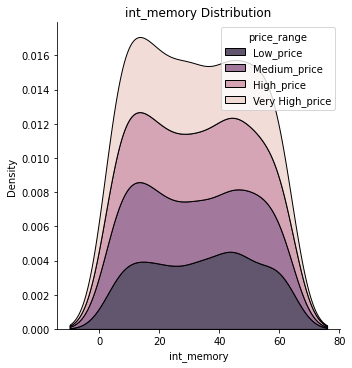

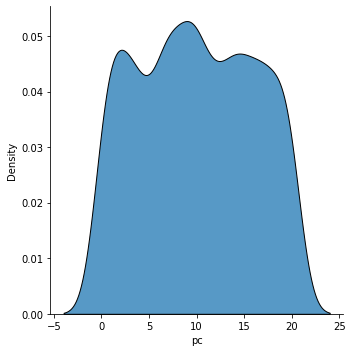

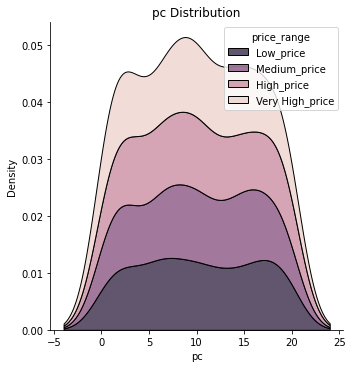

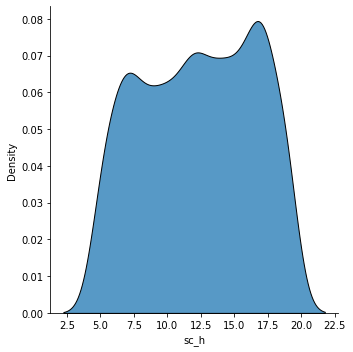

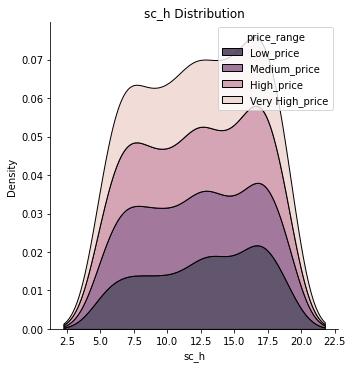

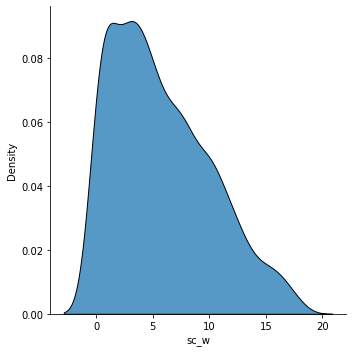

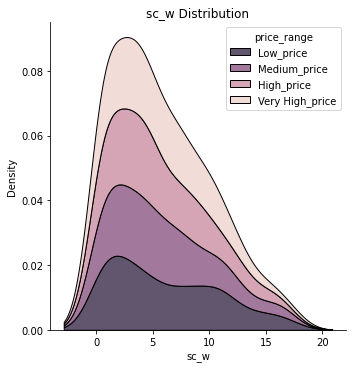

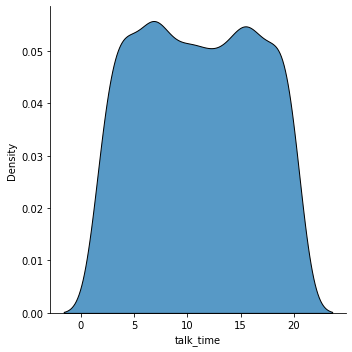

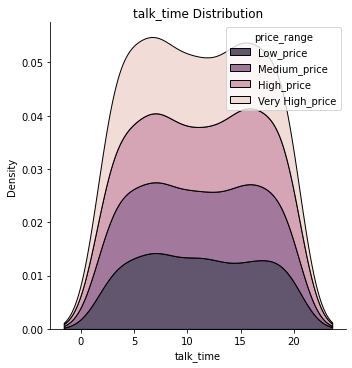

In [ ]:
for i in numeric_features:
  sns.displot(df, x=i, kind="kde",multiple="stack")
  sns.displot(df, x=i, hue="price_range", kind="kde", multiple="stack",legend=False)
  plt.title(i+' '+"Distribution")
  plt.legend(title='price_range',labels=['Low_price', 'Medium_price','High_price', 'Very High_price'])

    
 

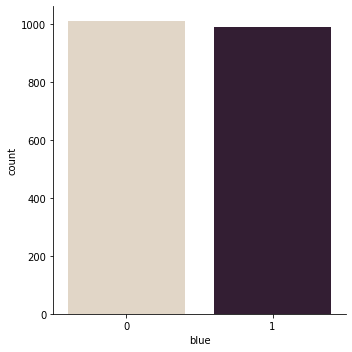

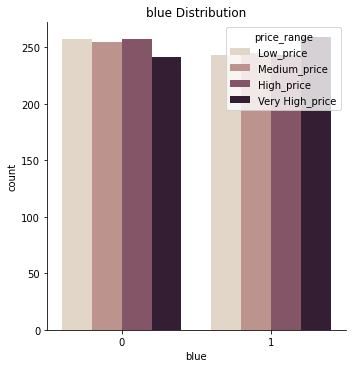

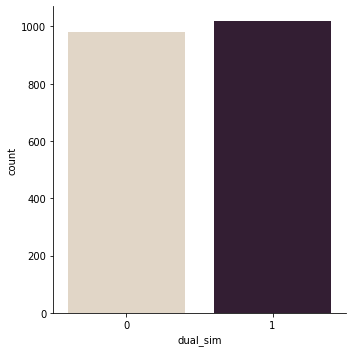

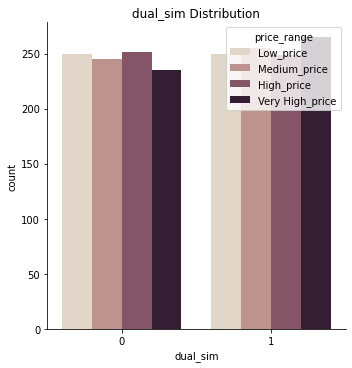

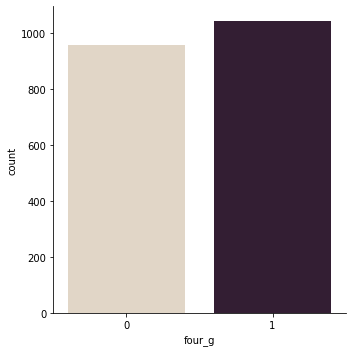

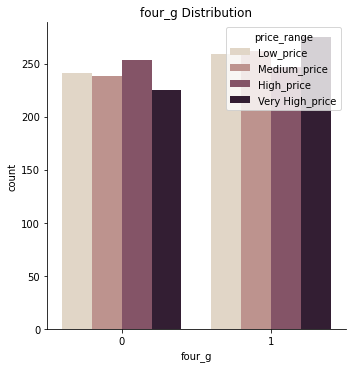

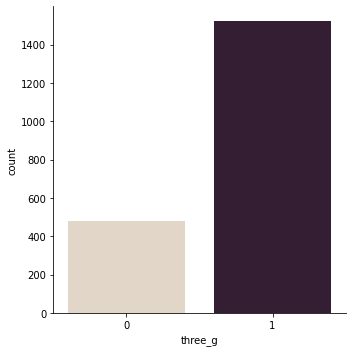

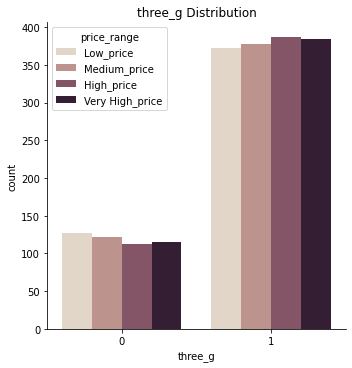

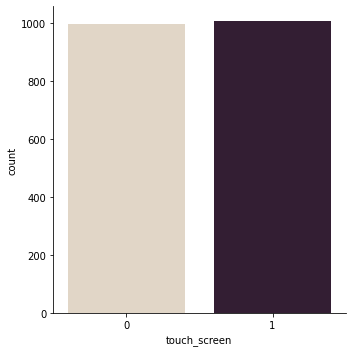

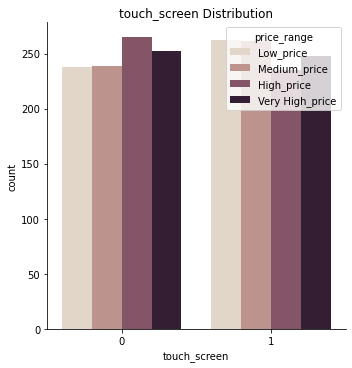

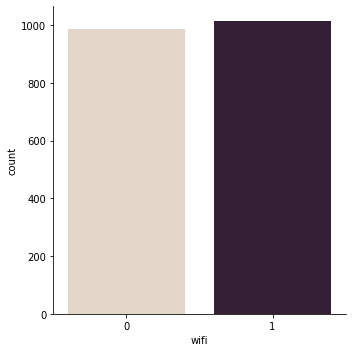

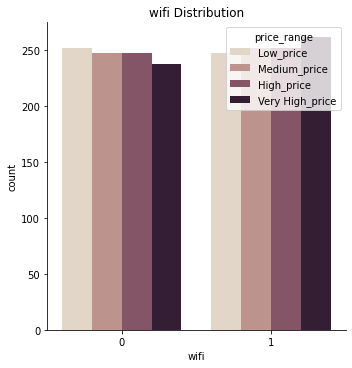

In [ ]:
for i in binary_features:
  sns.catplot(x=i, kind="count", palette="ch:.25", data=df)
  sns.catplot(x=i, kind="count", palette="ch:.25", data=df,hue="price_range",legend=False)
  plt.title(i+' '+"Distribution")
  plt.legend(title='price_range',labels=['Low_price', 'Medium_price','High_price', 'Very High_price'])
    

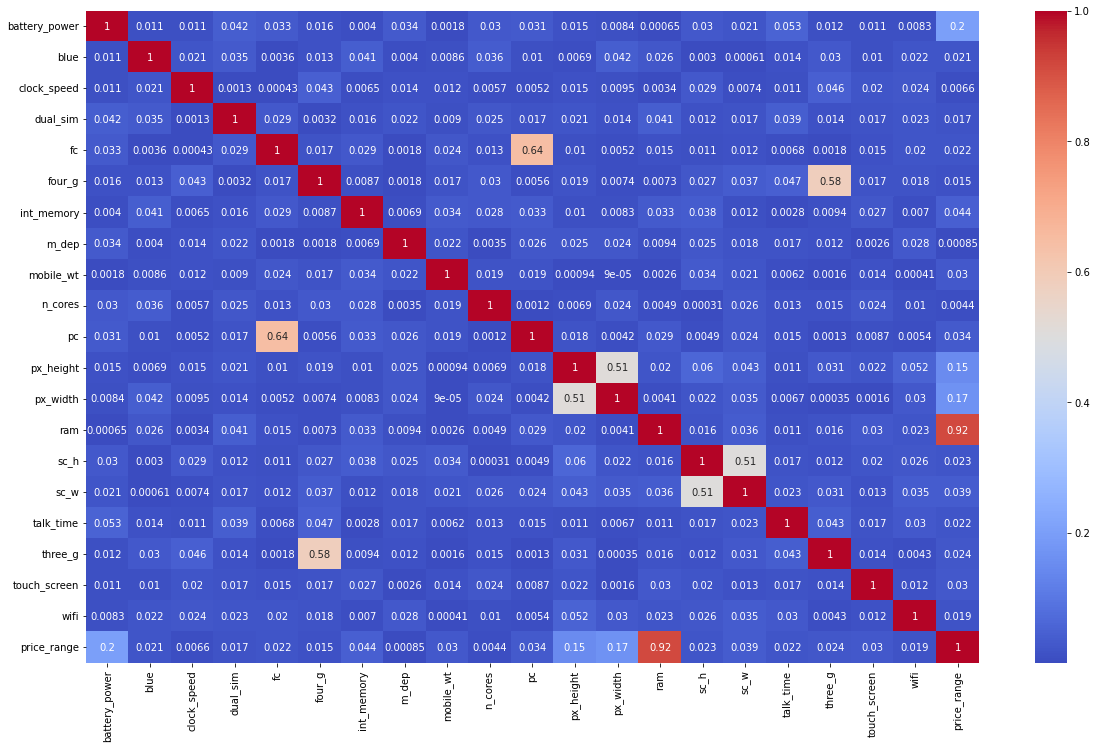

In [ ]:
 ## Correlation
plt.figure(figsize=(20,12))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#Some Highly Corelated Features to the Price Range

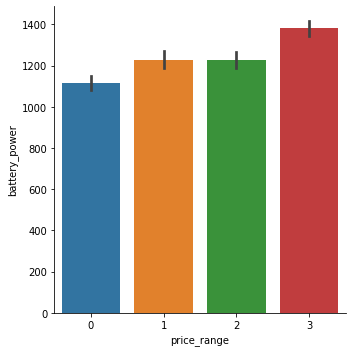

In [ ]:
#price_range vs battery_power
sns.catplot(x="price_range",y='battery_power', data=df, kind='bar')


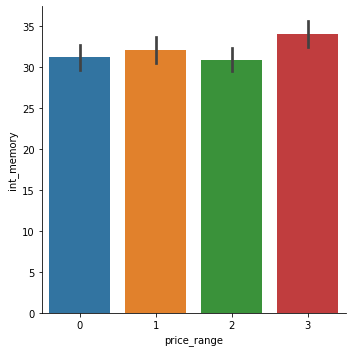

In [ ]:
#price_range vs int_memory
sns.catplot(x="price_range",y='int_memory', data=df, kind='bar')

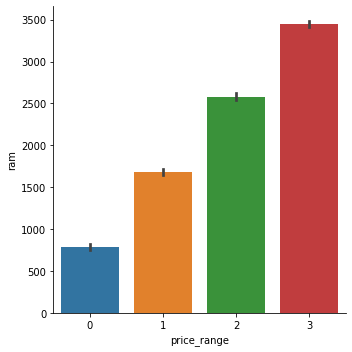

In [ ]:
#price_range vs ram
sns.catplot(x="price_range",y='ram', data=df, kind='bar')

In [ ]:
#Dependent feature
Y= df["price_range"]

In [ ]:
#Inependent feature
x= df.drop(['price_range'], axis = 1)

In [ ]:
#applying minmaxscaler
scaler=MinMaxScaler()
X=scaler.fit_transform(x)

#Train Test split

In [54]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, Y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


#Support Vector Machine Classifier

#Model Training

In [ ]:
clf = svm.SVC(kernel='poly')


In [ ]:
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:

#check training data accuracy
clf_train_pred = clf.predict(X_train)

clf_train_accuracy = accuracy_score(clf_train_pred, y_train)

In [ ]:
print("Accuracy on training data:",clf_train_accuracy )

Accuracy on training data: 0.9942857142857143


In [ ]:
from sklearn.metrics import classification_report
report_train=classification_report(clf_train_pred, y_train)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       350
           1       0.99      0.99      0.99       366
           2       0.99      0.99      0.99       350
           3       0.99      1.00      1.00       334

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


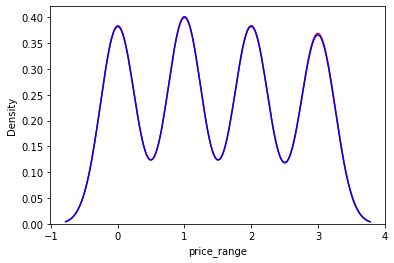

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(clf_train_pred,hist=False,color="b",ax=ax1)

#Model Testing

In [ ]:
#check testing data accuracy
clf_test_pred = clf.predict(X_test)

clf_test_accuracy = accuracy_score(clf_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",clf_test_accuracy )

Accuracy on test data: 0.8733333333333333


In [ ]:
report_test=classification_report(clf_test_pred, y_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       159
           1       0.80      0.79      0.79       137
           2       0.79      0.86      0.82       139
           3       0.94      0.93      0.94       165

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


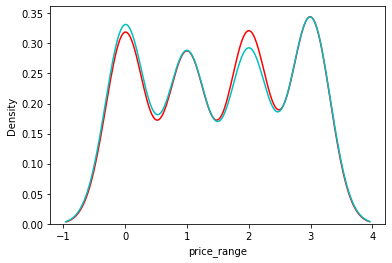

In [36]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(clf_test_pred,hist=False,color="c",ax=ax1)

#Random forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=42, shuffle=False)


##Model Training

In [38]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [39]:
#check training data accuracy
rf_train_pred = rf.predict(X_train)

rf_train_accuracy = accuracy_score(rf_train_pred, y_train)

In [40]:
print("Accuracy on test data:",rf_train_accuracy )

Accuracy on test data: 0.8092857142857143


In [41]:
train_report=classification_report(rf_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       377
           1       0.79      0.76      0.78       380
           2       0.56      0.77      0.65       251
           3       0.93      0.80      0.86       392

    accuracy                           0.81      1400
   macro avg       0.81      0.81      0.80      1400
weighted avg       0.83      0.81      0.82      1400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


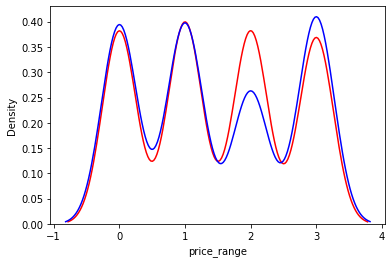

In [42]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(rf_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [43]:
#check testing data accuracy
rf_test_pred = rf.predict(X_test)

rf_test_accuracy = accuracy_score(rf_test_pred, y_test)

In [44]:
print("Accuracy on test data:",rf_test_accuracy )

Accuracy on test data: 0.7733333333333333


In [45]:
test_report=classification_report(rf_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       157
           1       0.75      0.68      0.71       149
           2       0.49      0.69      0.57       107
           3       0.91      0.79      0.85       187

    accuracy                           0.77       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.80      0.77      0.78       600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


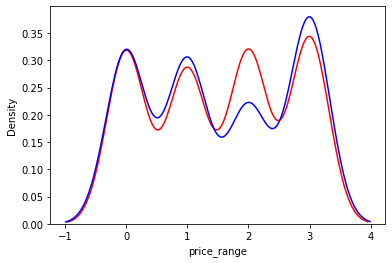

In [46]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(rf_test_pred,hist=False,color="b",ax=ax1)

##Importance of features 

In [47]:
importances = rf.feature_importances_
importances=list(importances)
features=list(x.describe(include='all'))
fea_imp_df = pd.DataFrame(list(zip(features, importances)),columns =['Features', 'Features_importance'])
fea_imp_df=fea_imp_df.sort_values(by=['Features_importance'] , ascending=False)

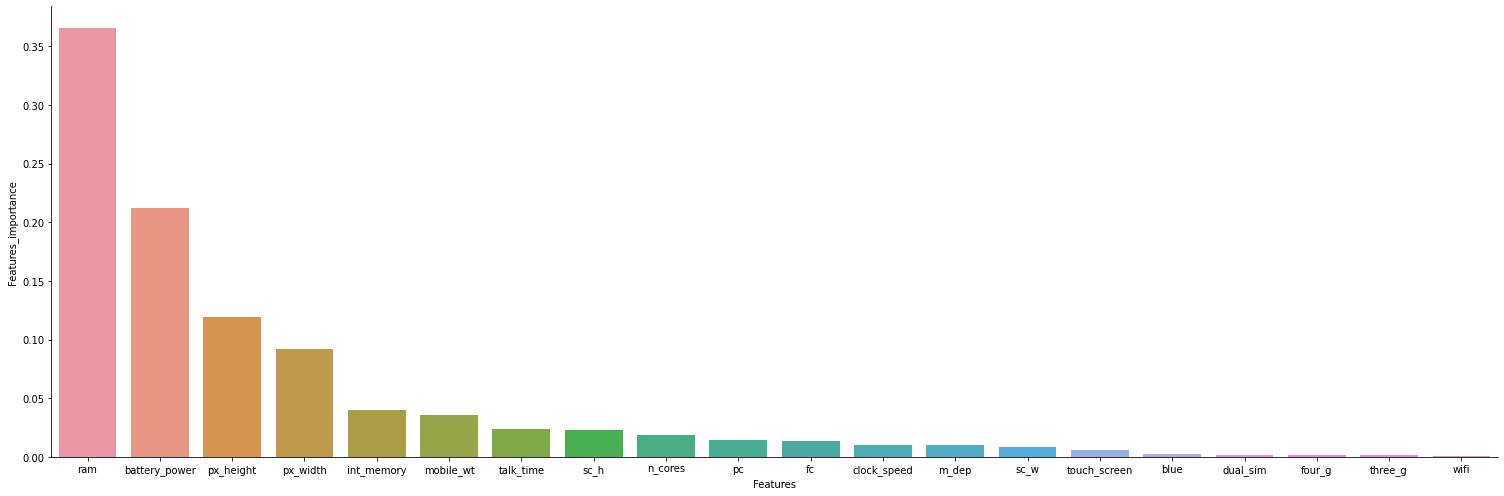

In [48]:
sns.catplot(x="Features",y='Features_importance', data=fea_imp_df, kind='bar',height=7,aspect=3)

##Random forest model with ram,battery_power,px_height,px_width,int_memory features

In [52]:
imp_fea_df=df[['ram','battery_power','px_height','px_width','int_memory']]
imp_fea_df

,ram,battery_power,px_height,px_width,int_memory
0,2549,842,20,756,7
1,2631,1021,905,1988,53
2,2603,563,1263,1716,41
3,2769,615,1216,1786,10
4,1411,1821,1208,1212,44
...,...,...,...,...,...
1995,668,794,1222,1890,2
1996,2032,1965,915,1965,39
1997,3057,1911,868,1632,36
1998,869,1512,336,670,46


In [56]:
x_imp= imp_fea_df
Y_imp=df['price_range']

In [57]:
#applying minmaxscaler
scaler=MinMaxScaler()
X=scaler.fit_transform(x_imp)

In [58]:
#train test split
from sklearn.model_selection import train_test_split 
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split( x_imp, Y_imp , test_size = 0.2, random_state = 0) 

##Training Model

In [60]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_imp_train,y_imp_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [61]:
#check training data accuracy
rf_train_imp_pred = rf.predict(X_imp_train)

rf_train_imp_accuracy = accuracy_score(rf_train_imp_pred, y_imp_train)

In [62]:
print("Accuracy on test data:",rf_train_imp_accuracy )

Accuracy on test data: 0.82


In [63]:
train_report=classification_report(rf_train_imp_pred, y_imp_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       450
           1       0.74      0.75      0.74       406
           2       0.62      0.81      0.70       310
           3       0.96      0.85      0.90       434

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.84      0.82      0.83      1600



##Testing Model

In [64]:
#check testing data accuracy
rf_test_imp_pred = rf.predict(X_imp_test)

rf_test_imp_accuracy = accuracy_score(rf_test_imp_pred, y_imp_test)

In [65]:
print("Accuracy on test data:",rf_test_imp_accuracy )

Accuracy on test data: 0.79


In [66]:
test_report=classification_report(rf_test_imp_pred, y_imp_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       105
           1       0.72      0.68      0.70        97
           2       0.47      0.75      0.58        63
           3       0.97      0.82      0.89       135

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.83      0.79      0.80       400



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

##Model Training

In [ ]:
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#check training data accuracy
reg_train_pred = reg.predict(X_train)

reg_train_accuracy = accuracy_score(reg_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",reg_train_accuracy )

Accuracy on test data: 0.9371428571428572


In [ ]:
train_report=classification_report(reg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       355
           1       0.92      0.91      0.91       366
           2       0.88      0.94      0.91       325
           3       0.99      0.94      0.96       354

    accuracy                           0.94      1400
   macro avg       0.94      0.94      0.94      1400
weighted avg       0.94      0.94      0.94      1400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


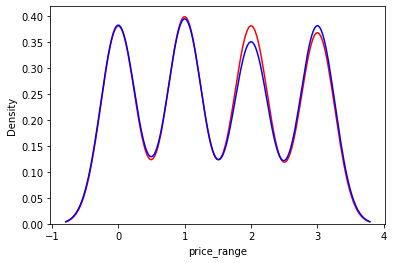

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(reg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [ ]:
#check testing data accuracy
reg_test_pred = reg.predict(X_test)

reg_test_accuracy = accuracy_score(reg_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",reg_test_accuracy )

Accuracy on test data: 0.915


In [ ]:
test_report=classification_report(reg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       158
           1       0.84      0.88      0.86       130
           2       0.87      0.87      0.87       151
           3       0.95      0.96      0.96       161

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


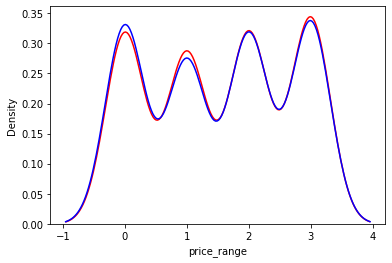

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(reg_test_pred,hist=False,color="b",ax=ax1)

#Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
Xgbclf=XGBClassifier()
Xgbclf.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

##Model Training

In [ ]:
#check training data accuracy
xg_train_pred = Xgbclf.predict(X_train)

xg_train_accuracy = accuracy_score(xg_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",xg_train_accuracy )

Accuracy on test data: 0.9914285714285714


In [ ]:
train_report=classification_report(xg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       350
           1       0.98      0.99      0.99       363
           2       0.99      0.99      0.99       350
           3       1.00      1.00      1.00       337

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


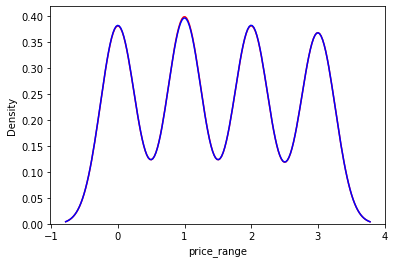

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(xg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [ ]:
#check testing data accuracy
xg_test_pred = Xgbclf.predict(X_test)

xg_test_accuracy = accuracy_score(xg_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",xg_test_accuracy )

Accuracy on test data: 0.9116666666666666


In [ ]:
test_report=classification_report(xg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       154
           1       0.89      0.87      0.88       138
           2       0.84      0.88      0.86       145
           3       0.94      0.94      0.94       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


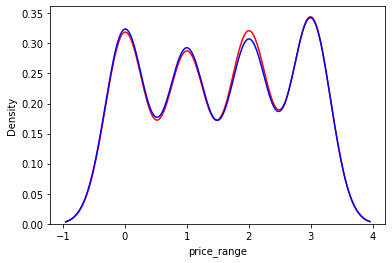

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(xg_test_pred,hist=False,color="b",ax=ax1)

#Conclusion:-

1.we achieve almost same accuracy using all features and using some importatnt features hence we can say that The main features that drive the mobile bphone price is ram,battery_power,pixel dimensions,int_memory. 

3.We achieve 92% of accuracy on test data using Logistic Regression.